<a href="https://colab.research.google.com/github/ksemiu/Classification-and-Trends-BEVs-and-PHEVs-in-Washington-s-Vehicle-Registry/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [16]:
# Load Dataset; Electric Vehicle Population Data from the State of Washionton State of Washington



df = pd.read_csv('/content/Electric_Vehicle_Population_Data copy.csv')


In [17]:
# Pre Processing

In [18]:
#Duplicate Value

df.duplicated().sum()

0

In [19]:
# Missing Data

df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [20]:
# Locating the missing data

df.columns[df.isnull().any()]

Index(['County', 'City', 'Postal Code', 'Legislative District',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

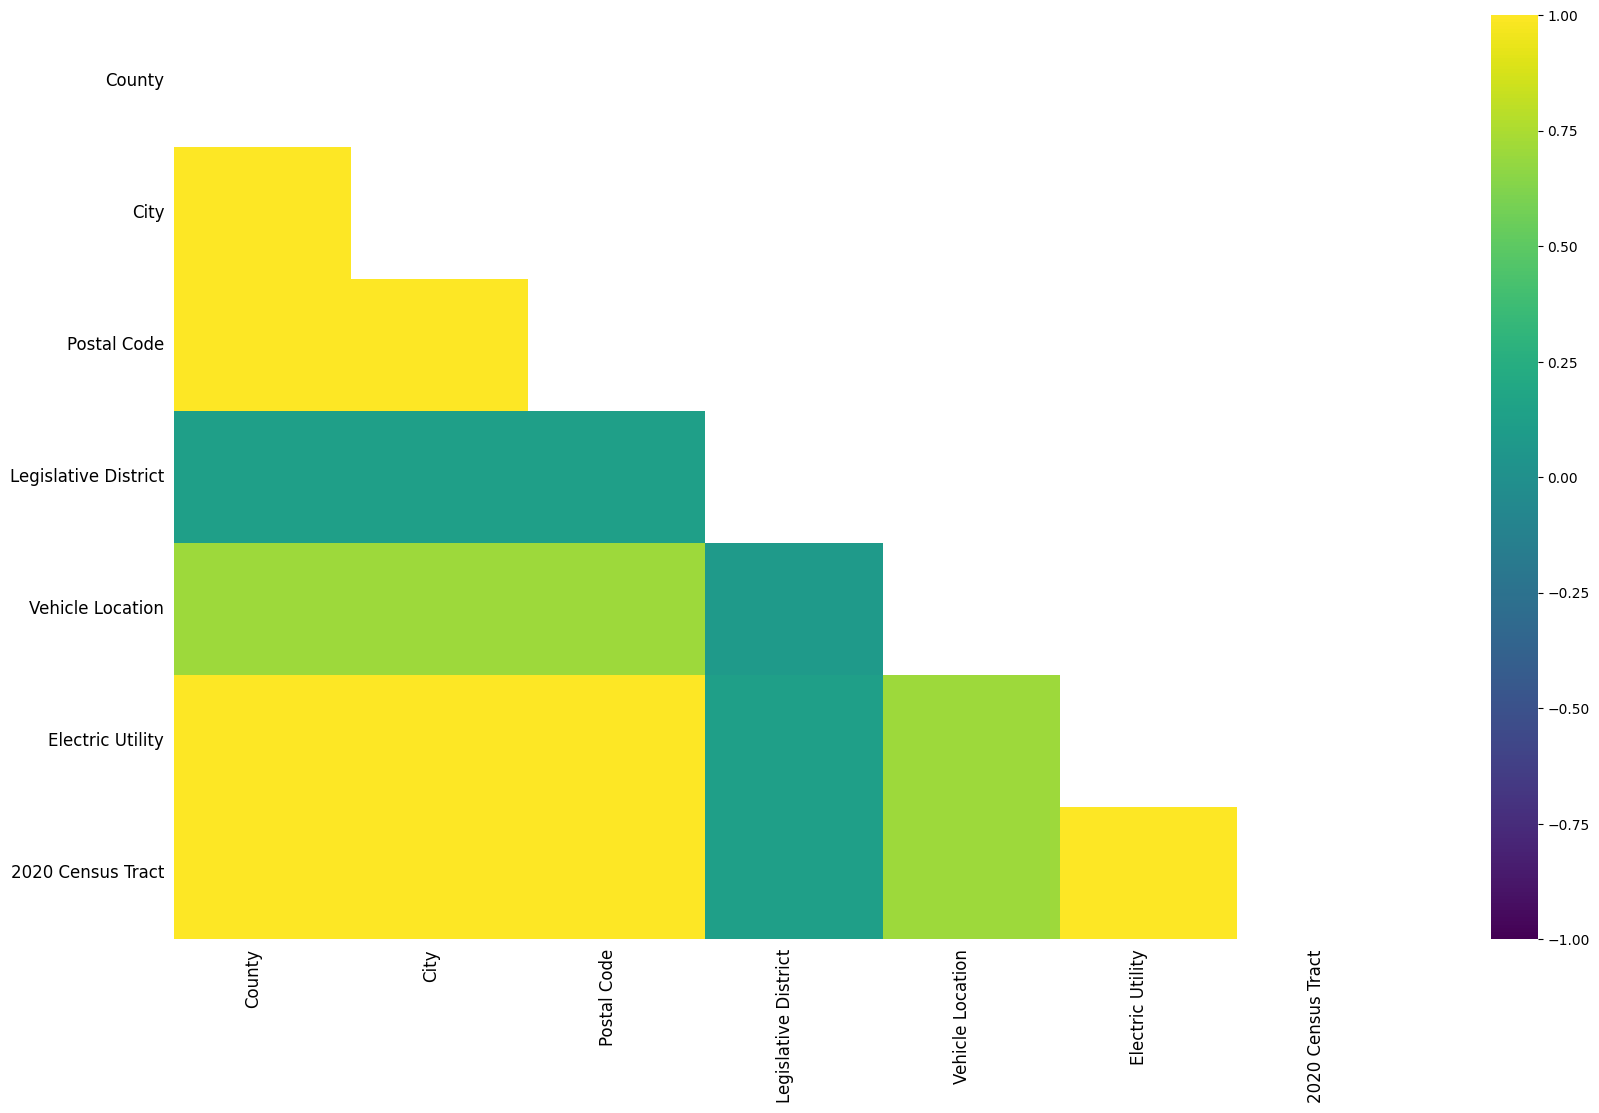

In [21]:
# Visually identifying attributes with missing values
missing_values = df.columns[df.isnull().any()]

#plotting heatmap of missing values with a different color
g = msno.heatmap(df[missing_values], fontsize=12, labels=False, cmap='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

The heatmap reveals correlations among certain features in terms of missing values, such as associations between City and County, Postal Code and City, Postal Code and County, among others. Consequently, the presence of a missing value in one column implies a corresponding missing value in another column within these identified correlations.

In [22]:
# Handling the missing values with complete case analysis

# Droping the missing values of City and County
df.dropna(subset=['County', 'City'], inplace=True)

#show missing values of data
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 355
DOL Vehicle ID                                         0
Vehicle Location                                       5
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [23]:
#inpute missing values for the other attributes; Legislative District and Vehicle Location

def impute_numeric_data(data, columns, strategy='median'):
    for col in columns:
        if strategy == 'median':
            median_value = data[col].median()
            data[col].fillna(median_value, inplace=True)
        elif strategy == 'mean':
            mean_value = data[col].mean()
            data[col].fillna(mean_value, inplace=True)
        # Add more conditions for other strategies if needed

def impute_categoric_data(data, columns):
    for col in columns:
        mode_value = data[col].mode().iloc[0]
        data[col].fillna(mode_value, inplace=True)


impute_numeric_data(df, ['Legislative District'], strategy='median')
impute_categoric_data(df, ['Model', 'Vehicle Location'])

#Show missing values after imputation
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


Below is from the project report;

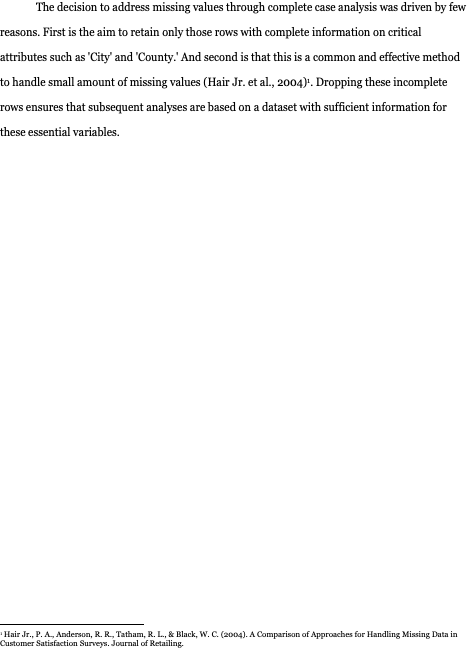

In [24]:
# Feature Engineering

# Standardizing and Simplifying the attributes
# Dictionary for replacements for attribute Electric Vehicle Type for simplication
replacement_dict = {
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV',
    'Battery Electric Vehicle (BEV)': 'BEV'
}

# Apply the replacements using the map function
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].map(replacement_dict)

# Renaming CAFV
df.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'Clean Alternative Fuel Vehicle Eligibility'}, inplace=True)


In [25]:
# Extracing the exacty longitude and latitude from 'Vehicle Location' column
def extract_coordinates(point_string):
    coordinates = point_string.replace('POINT', '').replace('(', '').replace(')', '')
    longitude, latitude = coordinates.split()
    return float(longitude), float(latitude)



In [26]:
# Apply the 'extract_coordinates' function to 'Vehicle Location' column and create new 'Longitude' and 'Latitude' columns
df[['Longitude', 'Latitude']] = df['Vehicle Location'].apply(extract_coordinates).apply(pd.Series)
df = df.drop('Vehicle Location', axis=1)

The step to extract the longitude and latitude from the "Vehicle Location" column was taken to obtain precise and accurate location information.



In [27]:
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Apply the state mapping using the replace method
df['State'] = df['State'].replace(state_mapping)

# Function to extract the first substring from a column
def extract_substring(data, column_name):
    data[column_name] = data[column_name].str.split('-|\\|').str[0].str.strip()

# Apply the 'extract_substring' function to 'Electric Utility' column
extract_substring(df, 'Electric Utility')

In [28]:
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,3C3CFFGE4E,Yakima,Yakima,Washington,98902.0,2014,FIAT,500,BEV,Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,PACIFICORP,5.307700e+10,-120.524012,46.597394
1,5YJXCBE40H,Thurston,Olympia,Washington,98513.0,2017,TESLA,MODEL X,BEV,Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,PUGET SOUND ENERGY INC,5.306701e+10,-122.817545,46.988760
2,3MW39FS03P,King,Renton,Washington,98058.0,2023,BMW,330E,PHEV,Not eligible due to low battery range,20,0,11.0,224071816,PUGET SOUND ENERGY INC,5.303303e+10,-122.129888,47.445126
3,7PDSGABA8P,Snohomish,Bothell,Washington,98012.0,2023,RIVIAN,R1S,BEV,Eligibility unknown as battery range has not b...,0,0,21.0,260084653,PUGET SOUND ENERGY INC,5.306105e+10,-122.187300,47.820245
4,5YJ3E1EB8L,King,Kent,Washington,98031.0,2020,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,PUGET SOUND ENERGY INC,5.303303e+10,-122.201252,47.393181


In [29]:
# Encoding


For Naïve Bayes and Random Forest, encoding may not be a strict requirement, but it's always a good practice to check and see if encoding improves model performance.

For Logistic Regression and XGBoost, encoding is typically necessary for categorical variables, and feature scaling might be beneficial, especially for Logistic Regression.

In [30]:
pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


In [31]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce


In [32]:
# Define a function to encode categorical data into numeric

def encode_data(data, columns, method):
    # One-hot encoding
    if method == 'ohe':
        encoded_columns = pd.get_dummies(data[columns], prefix=columns)
        data = pd.concat([data, encoded_columns], axis=1)
        data.drop(columns, axis=1, inplace=True)

    # Ordinal encoding
    elif method == 'ordinal':
        ordinal_enc = OrdinalEncoder()
        encoded_columns = ordinal_enc.fit_transform(data[columns])
        data[columns] = encoded_columns
        data[columns] = encoded_columns.astype(int)

    # Frequency encoding
    elif method == 'frequency':
        encoder = ce.CountEncoder(cols=columns)
        data = encoder.fit_transform(data)

    return data


In [33]:
# Define ordinal and frequency columns

ordinal_columns = ['State', 'Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility']
frequency_columns = ['VIN (1-10)', 'County', 'City', 'Model', 'Electric Utility']

train = df.copy()

# apply the 'encode_data' function to 'ordinal_columns' and 'frequency_columns'
train = encode_data(train, ordinal_columns, method='ordinal')
train = encode_data(train, frequency_columns, method='frequency')

train

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,8,943,639,39,98902.0,2014,9,801,0,0,87,0,14.0,1593721,1245,5.307700e+10,-120.524012,46.597394
1,4,6042,4058,39,98513.0,2017,33,5428,0,0,200,0,2.0,257167501,98811,5.306701e+10,-122.817545,46.988760
2,5,86594,4617,39,98058.0,2023,4,431,1,2,20,0,11.0,224071816,98811,5.303303e+10,-122.129888,47.445126
3,98,19570,5440,39,98012.0,2023,30,1622,0,1,0,0,21.0,260084653,98811,5.306105e+10,-122.187300,47.820245
4,170,86594,2602,39,98031.0,2020,33,28925,0,0,322,0,33.0,253771913,98811,5.303303e+10,-122.201252,47.393181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166795,13,4312,2573,39,99223.0,2013,11,1778,1,2,19,0,6.0,239527123,32454,5.306300e+10,-117.369705,47.626370
166796,410,86594,4876,39,98074.0,2021,33,32822,0,1,0,0,45.0,148715479,98811,5.303303e+10,-122.031327,47.628578
166797,375,19570,737,39,98275.0,2022,33,32822,0,1,0,0,21.0,220504406,98811,5.306104e+10,-122.299965,47.941710
166798,10,709,28,39,98564.0,2013,6,4825,1,0,38,0,20.0,156418475,32454,5.304197e+10,-122.487535,46.529013


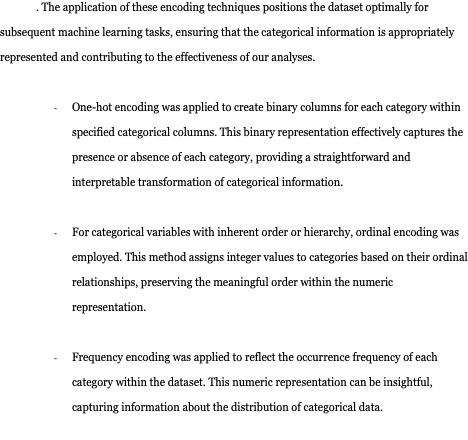

In [34]:
df.shape


(166795, 18)